<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataframe
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
#Analysis

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

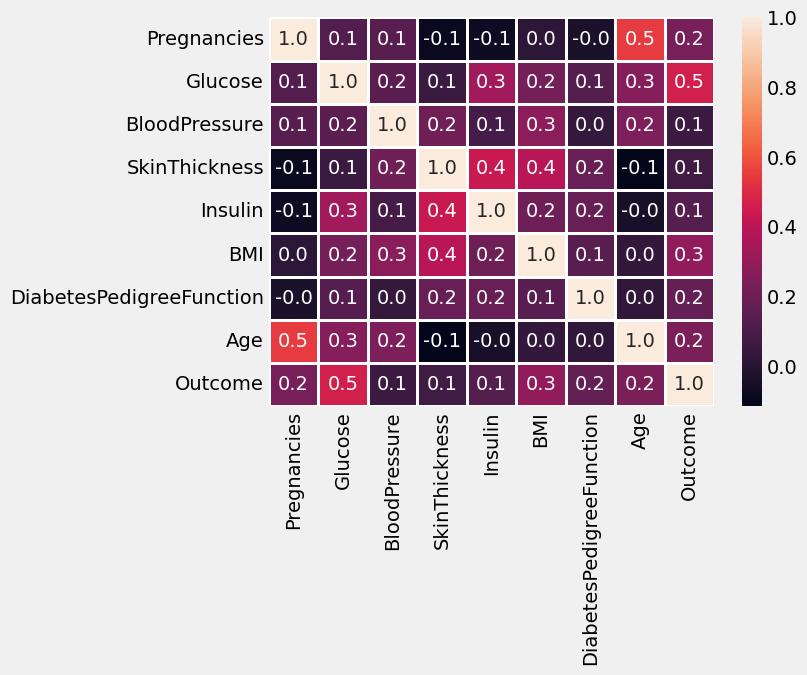

In [ ]:
sns.heatmap(data.corr(),annot=True ,fmt='0.1f' ,linewidths=.8)

<ipython-input-18-cdc14c766623>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome' , data = data  , palette=['green' , 'red'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Outcome', ylabel='count'>

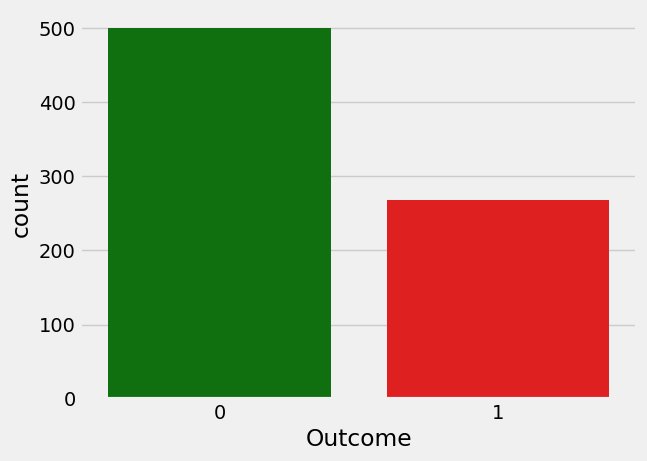

In [ ]:
sns.countplot(x='Outcome' , data = data  , palette=['green' , 'red'])

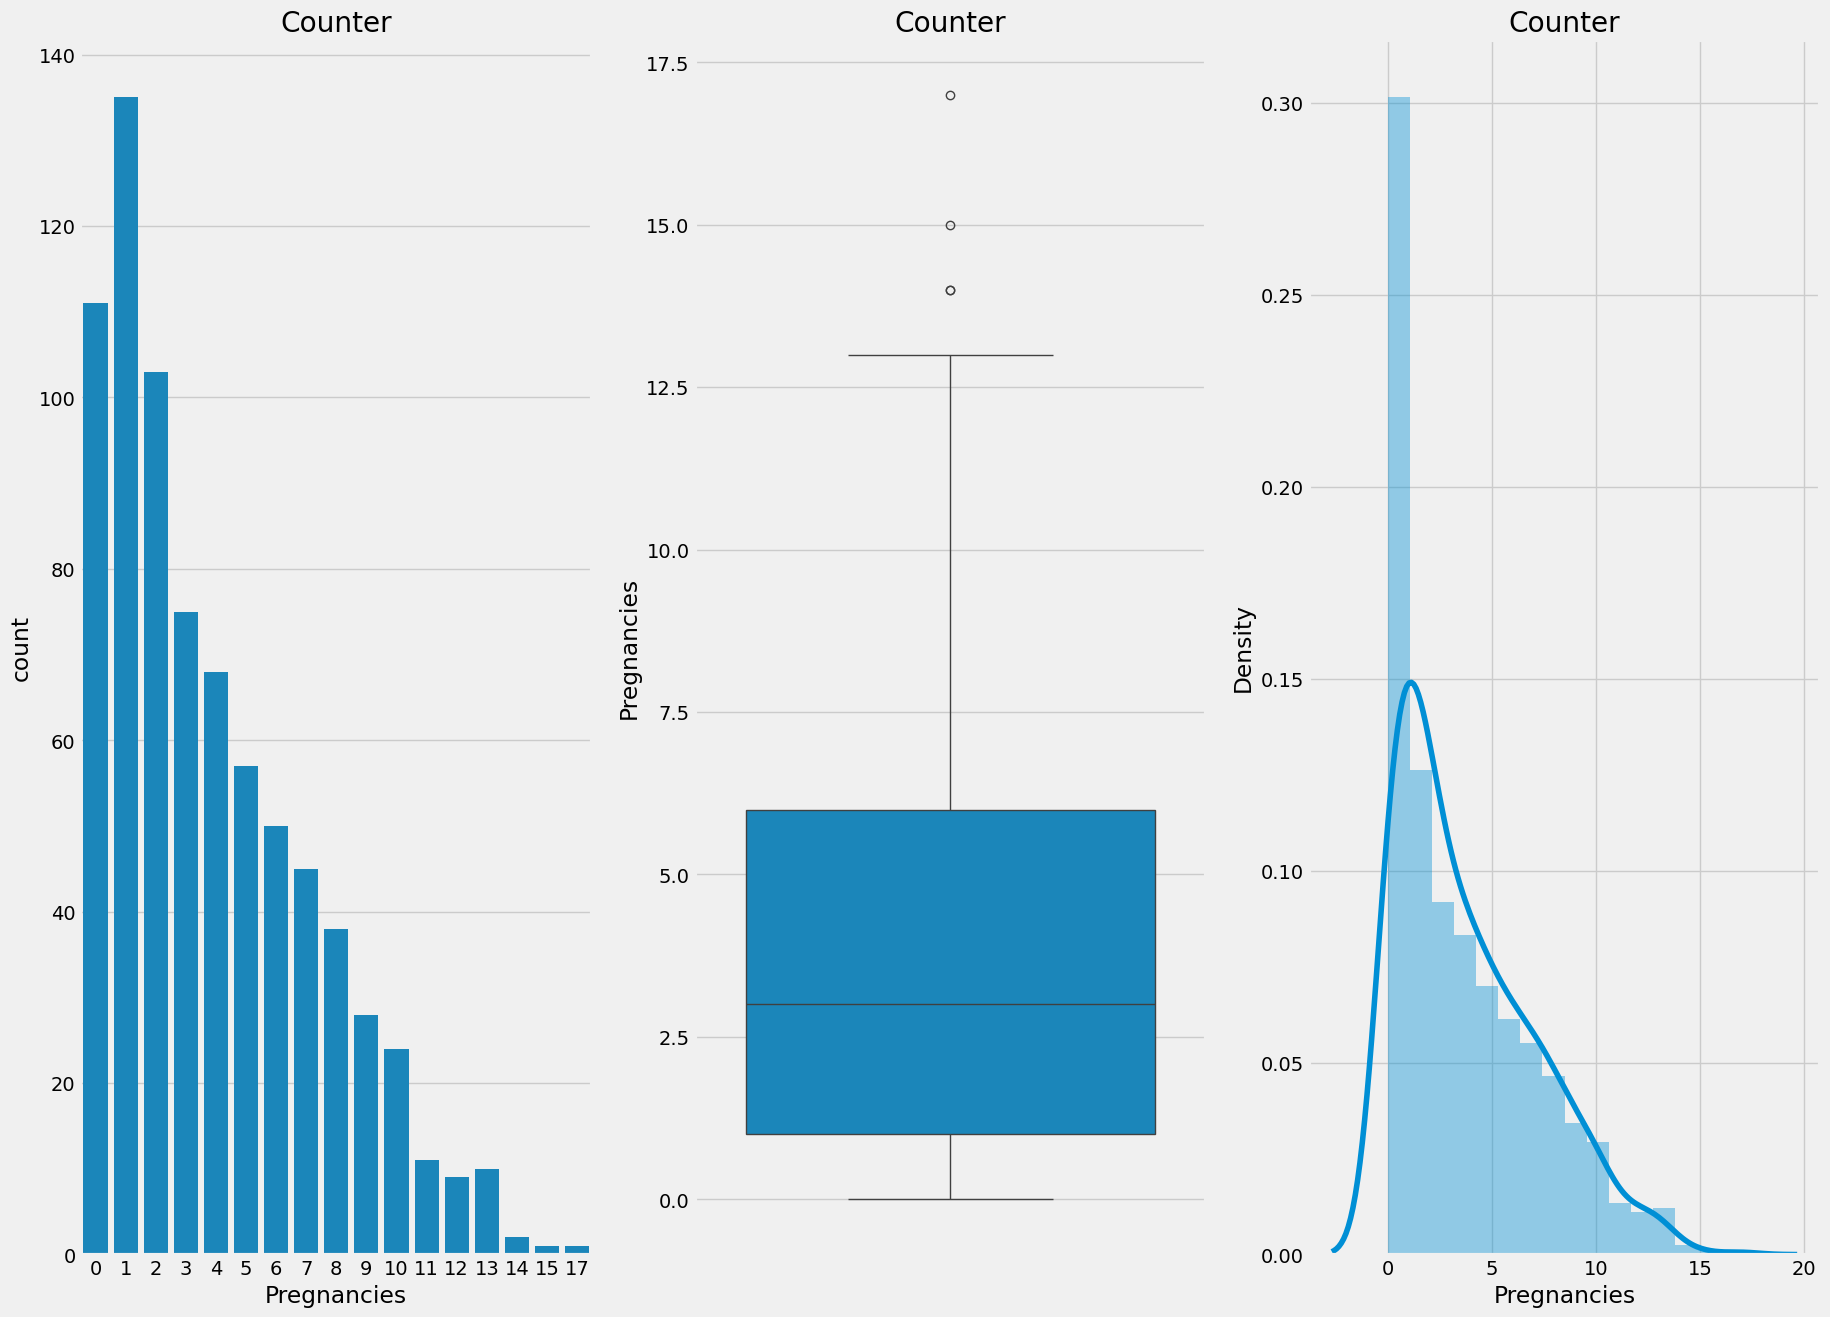

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.title('Counter')
sns.countplot(x='Pregnancies' , data = data  )

plt.subplot(1,3,2)
plt.title('Counter')
sns.boxplot(y=data['Pregnancies']  )

plt.subplot(1,3,3)
plt.title('Counter')
sns.distplot(data['Pregnancies']  )
plt.show()

<Axes: ylabel='Age'>

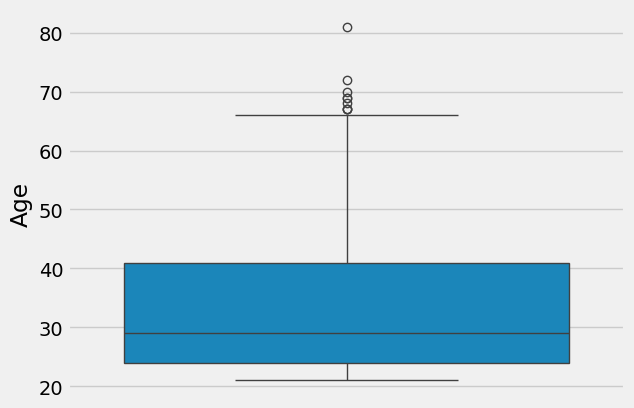

In [ ]:
sns.boxplot(data.Age)


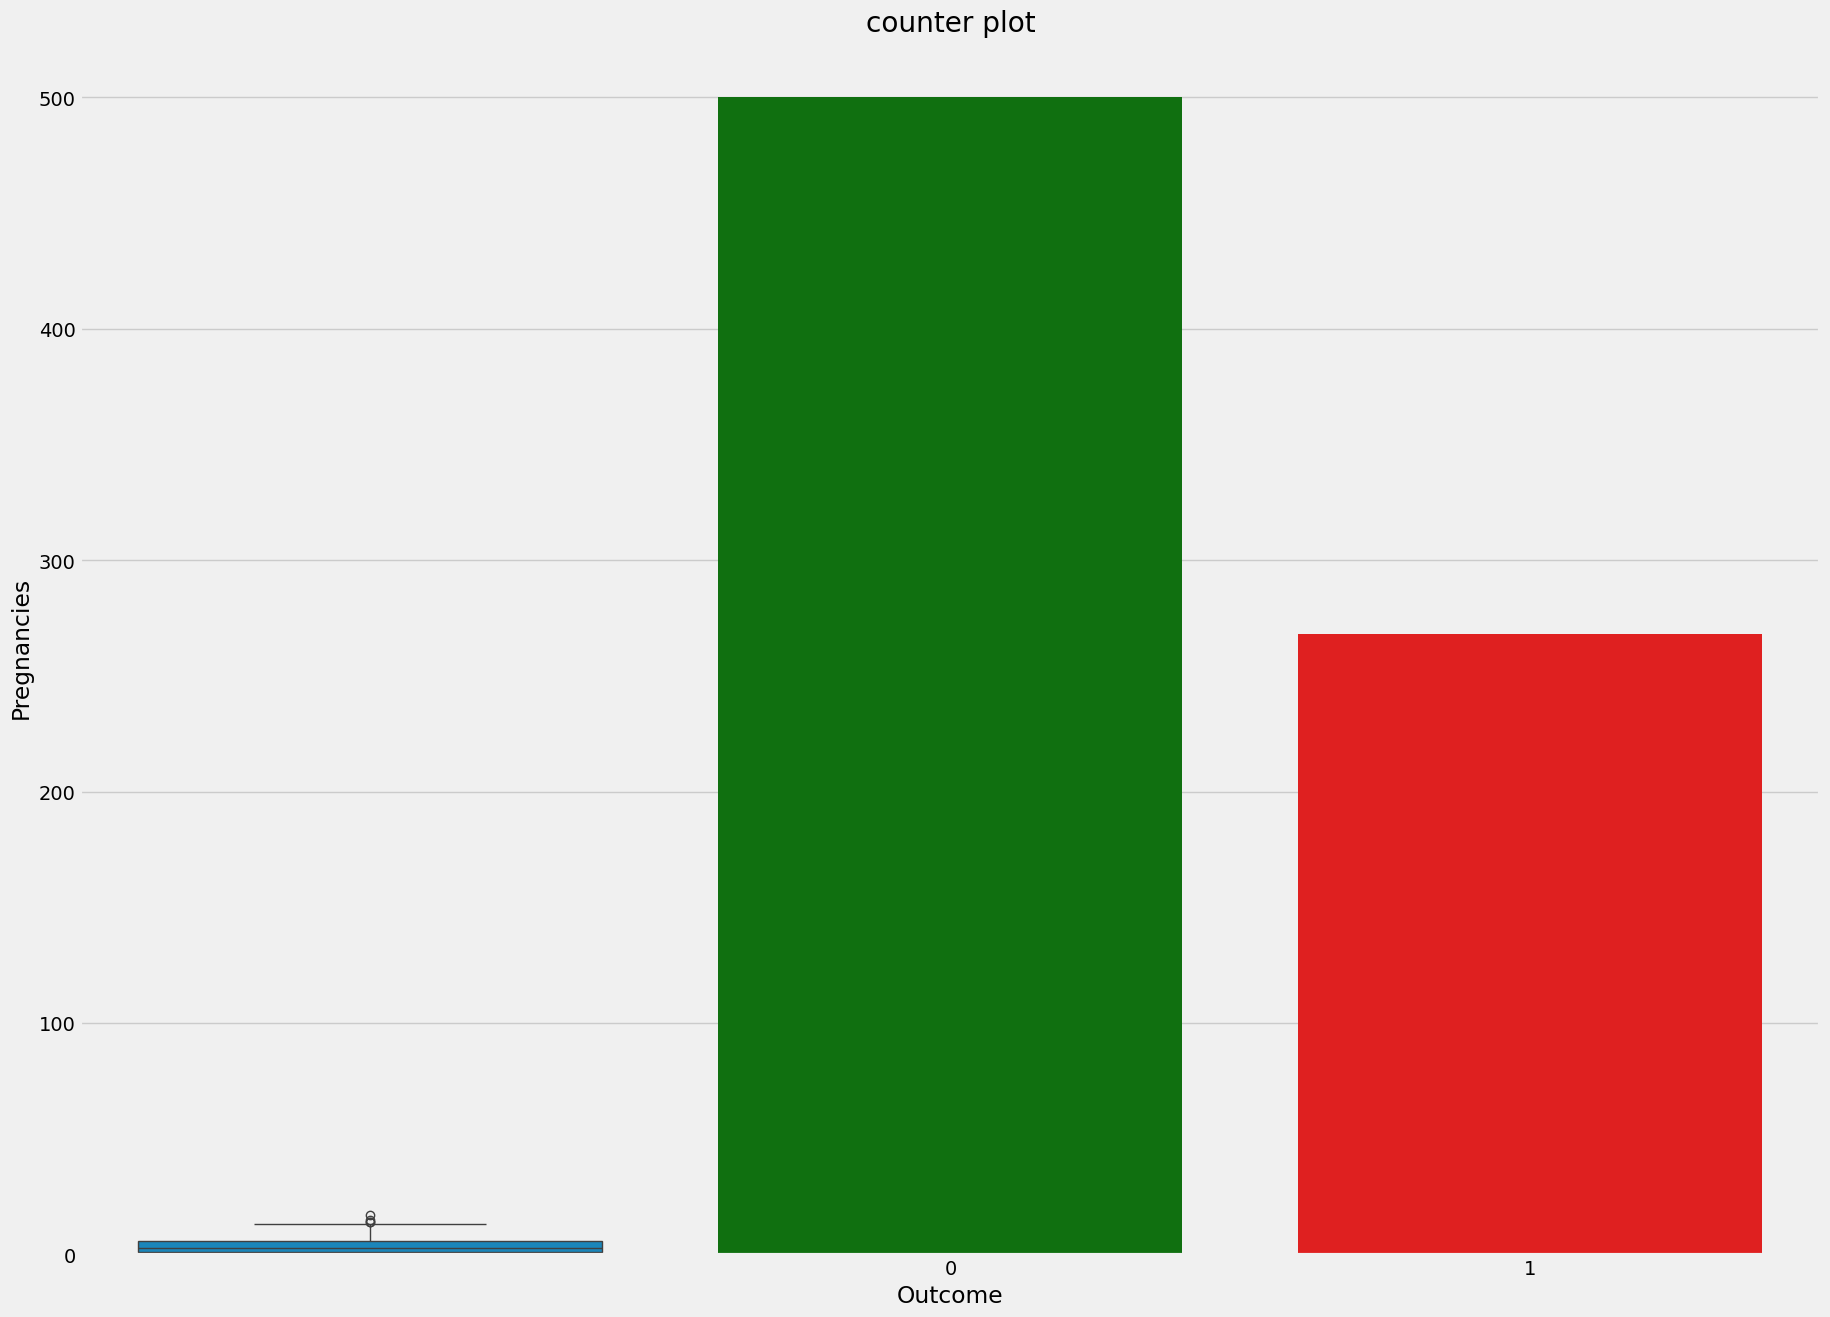

In [ ]:
plt.figure(figsize=(20,15))
plt.title('counter plot')
sns.boxplot(y=data['Pregnancies']  )

sns.countplot(x='Outcome' , data = data  , palette=['green' , 'red'])
plt.show()

In [ ]:
#Create Model


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Age'>

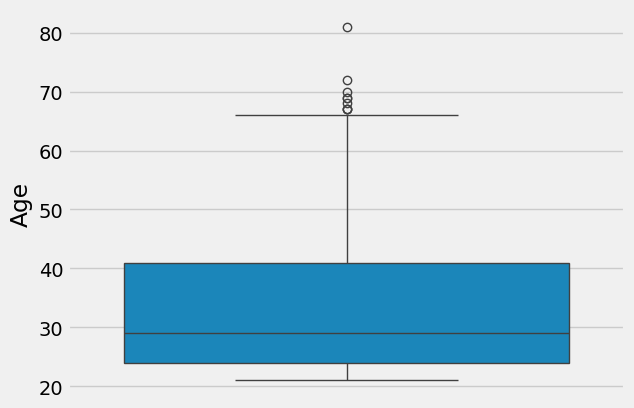

In [ ]:
sns.boxplot(data.Age)


In [ ]:
x= data.drop('Outcome' , axis=1)
y= data['Outcome']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=20)



In [ ]:
model1 = LogisticRegression()
model2 =SVC()
model3= RandomForestClassifier()
model4 = GradientBoostingClassifier()

LogisticRegression()

In [ ]:
pre = model1.predict(x_test)
accuracy = accuracy_score( pre , y_test)
recall = recall_score( pre , y_test)
f1 = f1_score( pre , y_test)
model1 = LogisticRegression()
model2 =SVC()
model3= RandomForestClassifier()
model4 = GradientBoostingClassifier()
columns = ['LogisticRegression' , 'SVC' , 'RandomForestClassifier' , 'GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]


accuray  : 0.8
recall  : 0.6666666666666666
f1 :  0.5


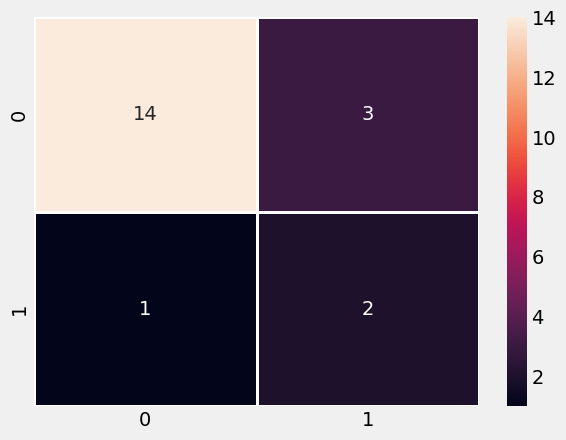

In [ ]:
def cal(model):
    global result1, result2, result3  # Declare result1, result2, and result3 as global
    model.fit(x_train , y_train)
    pre = model.predict(x_test) # pre should be calculated after model.fit
    accuracy = accuracy_score( pre , y_test)
    recall = recall_score( pre , y_test)
    f1 = f1_score( pre , y_test)
    confusion_matrix(pre , y_test)
    sns.heatmap(confusion_matrix(pre , y_test) , annot=True , linewidth=.9)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

    print('accuray  :', accuracy_score( pre , y_test))
    print('recall  :', recall_score( pre , y_test))
    print('f1 : ', f1_score( pre , y_test))

cal(model1)

sns.countplot(x='Outcome' , data = data  , palette=['green' , 'red'])

accuray  : 0.85
recall  : 1.0
f1 :  0.5714285714285714
accuray  : 0.8
recall  : 0.6
f1 :  0.6
accuray  : 0.8
recall  : 0.6666666666666666
f1 :  0.5


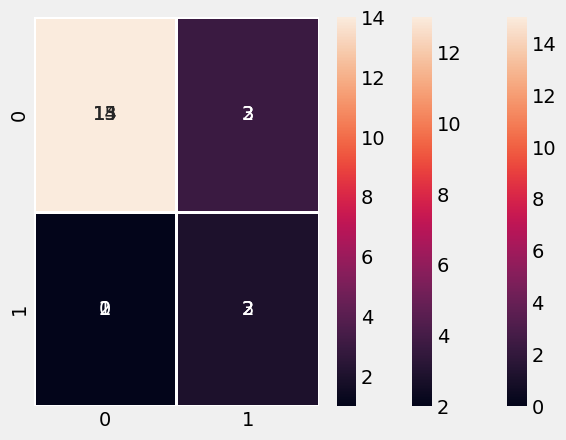

In [ ]:
cal(model2)
cal(model3)
cal(model4)

In [ ]:
result2

[0.6666666666666666, 1.0, 1.0, 0.6, 0.6666666666666666]

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

result3

In [ ]:
finalResult = pd.DataFrame({'Algorithm' :  columns , 'Accuracies' : accuracy , 'recall ' : recall , 'f1' : f1})

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

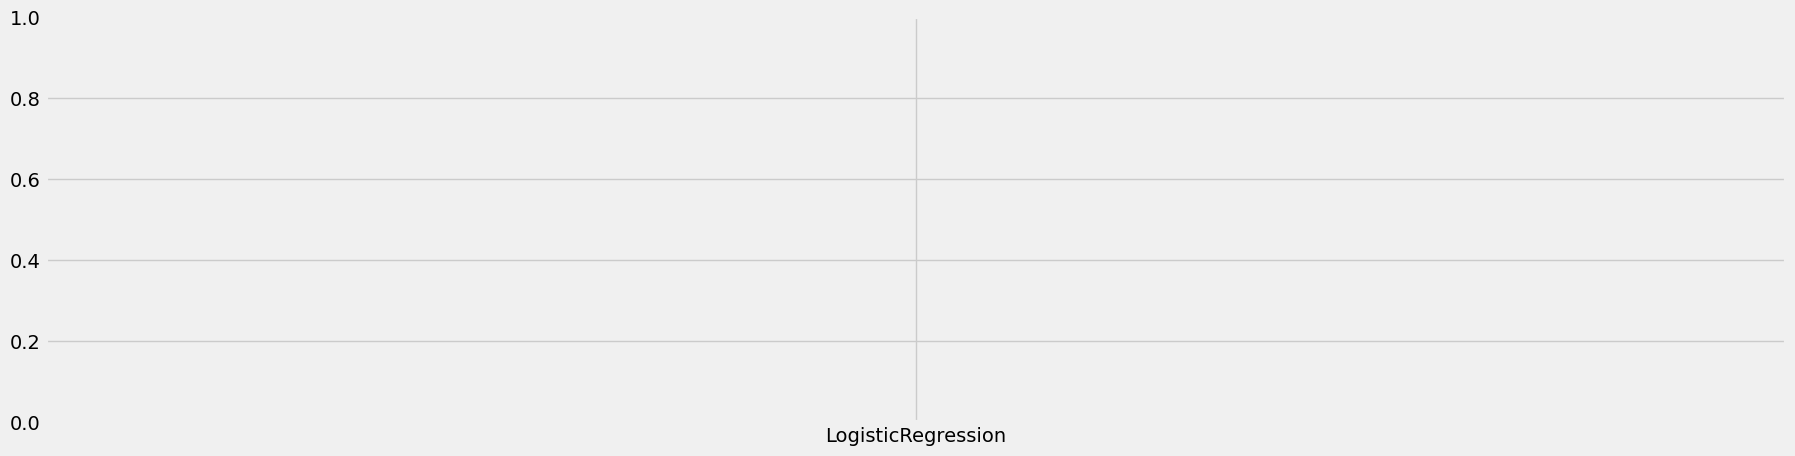

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(finalResult.Algorithm,result1 , label = 'Accuracies')
plt.plot(finalResult.Algorithm,result2 , label = 'recall')
plt.plot(finalResult.Algorithm,result3 , label = 'f1')
plt.legend()
plt.show()